In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.compose import ColumnTransformer 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df_original = pd.read_excel('marketing_campaign.xlsx')

In [3]:
df_original.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
df_original.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Data Cleaning - First stage

### Drop rows with missing values and abnormalities

In [5]:
df1 = df_original.copy()

# Missing values
df1 = df1[~df1['Income'].isna()]

# People older than 90
df1 = df1[~((2020 - df1["Year_Birth"])>90)]

### Convert year_birth to age

In [6]:
# Age
age = 2020 - df1['Year_Birth']
df1.insert (1, 'Age', age)
df1 = df1.drop(labels='Year_Birth', axis=1)

### Drop impractical features 

In [7]:
# Constant features
std = df1.describe().iloc[2,:]
const_f = std[std<0.05].index.tolist()
df1 = df1.drop(labels=const_f, axis=1)

# ID
df1 = df1.drop(labels='ID', axis=1)

### Convert str_date to datetime

In [8]:
def convert_to_days(date_time_str):
    date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d')
    delta = datetime.today()-date_time_obj
    return delta.days

In [9]:
df1['Days_Customer'] = df1['Dt_Customer'].apply(convert_to_days)
df1.drop(labels='Dt_Customer', axis=1, inplace=True)

In [10]:
df1.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_Customer
0,63,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2912
1,66,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2362
2,55,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2561
3,36,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2388
4,39,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2410


### Categorical Features Exploratory Analysis

In [11]:
cat_feature = ["Education", "Marital_Status","Kidhome","Teenhome", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4","AcceptedCmp5", "Complain"]

In [12]:
# Discrimination ability = average response rate per class (category)

def GroupCatergoticalFeatures(df,feature):
    fl=[]
    for fc in cat_feature:
        fl.append(df.groupby([fc]).agg({'Response':['count','mean']}))
        fm = pd.concat(fl, keys = cat_feature)

    df_groupby_cat = pd.DataFrame({"Number of observations" : fm.iloc[:,0], "Discrimination ability" : fm.iloc[:,1],  
                           "More than 40 observations" : fm.iloc[:,0]>40})
    return df_groupby_cat

GroupCatergoticalFeatures(df1, cat_feature)

Number of observations  Discrimination ability  \
Education      2n Cycle                       198                0.111111   
               Basic                           54                0.037037   
               Graduation                    1116                0.136201   
               Master                         365                0.153425   
               PhD                            480                0.210417   
Marital_Status Absurd                           2                0.500000   
               Alone                            3                0.333333   
               Divorced                       231                0.207792   
               Married                        857                0.114352   
               Single                         470                0.225532   
               Together                       572                0.104895   
               Widow                           76                0.236842   
               YOLO                             2                0.500000   
Kidhome        0                             1281                0.172521   
               1                              886                0.124153   
               2                               46                0.043478   
Teenhome       0                             1145                0.206114   
               1                             1017                0.090462   
               2                               51                0.098039   
AcceptedCmp1   0                             2071                0.122646   
               1                              142                0.556338   
AcceptedCmp2   0                             2183                0.143381   
               1                               30                0.666667   
AcceptedCmp3   0                             2050                0.124878   
               1                              163                0.472393   
AcceptedCmp4   0                             2049                0.132260   
               1                              164                0.378049   
AcceptedCmp5   0                             2052                0.117934   
               1                              161                0.565217   
Complain       0                             2193                0.150479   
               1                               20                0.150000   

                           More than 40 observations  
Education      2n Cycle                         True  
               Basic                            True  
               Graduation                       True  
               Master                           True  
               PhD                              True  
Marital_Status Absurd                          False  
               Alone                           False  
               Divorced                         True  
               Married                          True  
               Single                           True  
               Together                         True  
               Widow                            True  
               YOLO                            False  
Kidhome        0                                True  
               1                                True  
               2                                True  
Teenhome       0                                True  
               1                                True  
               2                                True  
AcceptedCmp1   0                                True  
               1                                True  
AcceptedCmp2   0                                True  
               1                               False  
AcceptedCmp3   0                                True  
               1                                True  
AcceptedCmp4   0                                True  
               1                                True  
AcceptedCmp5   0      

In [13]:
# Calculate the average response rate of the whole dataset
avg_discrimination_ability = df1['Response'].mean()

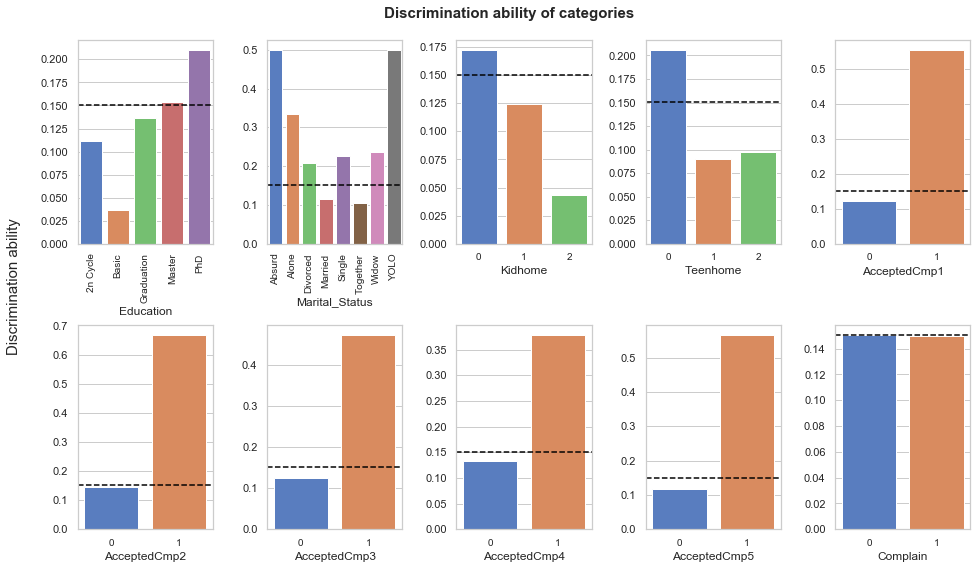

In [14]:
def PlotCategoricalFeatures(df,feature,response_mean):
    df_group = GroupCatergoticalFeatures(df, cat_feature)
    
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    i=1
    sns.set(style='whitegrid')
    for fc in feature:
        plot_series=df_group.loc[fc].iloc[:,1]
        plot_df=pd.DataFrame(plot_series)
        plot_df.reset_index(inplace=True)
        plot_df.rename(columns={'index': fc},inplace=True)
        ax = fig.add_subplot(2, 5, i)
        ax = sns.barplot(x=plot_df[fc],y=plot_df['Discrimination ability'], palette='muted')
        ax.set_ylabel("", size = 10)
        ax.axhline(y=response_mean, color="black", ls='--')
        if fc in ['Education','Marital_Status']:
            ax.set_xticklabels(plot_df[fc], size=10,rotation=90)
        else:
            ax.set_xticklabels(plot_df[fc], size=10)
        i+=1
    fig.suptitle('Discrimination ability of categories', ha='center', va='center', fontsize=15, y=0.92, fontweight='bold')
    fig.yaxis_title='Discrimination ability'
    fig.text(0.07, 0.5,'Discrimination ability', ha='center', va='center', rotation='vertical', fontsize=15)
    fig.set_figheight(9)
    fig.set_figwidth(16)
    
PlotCategoricalFeatures(df1, cat_feature,avg_discrimination_ability)

- Education: PhD and Master are above the 15% Discrimination Ability threshold.
- Marital Status: Only Married and Together are below the threshold.
- AcceptedCampaign: All of the 5 previous campaigns show that, as expected, the clients which accepted the campaigns show discrimination ability above the threshold.
- Complain: While both who does and does not registered complains show high discrimination ability, only the ones who did complain show a discrimination ability higher than the threshold.

### Group Education and Marital Status classes with low discrimination ability and low observations

In [15]:
df_groupby_cat = GroupCatergoticalFeatures(df1, cat_feature)
df_groupby_cat[(df_groupby_cat['More than 40 observations']==False) | (df_groupby_cat['Discrimination ability']<avg_discrimination_ability)].loc[['Education','Marital_Status']]

Number of observations  Discrimination ability  \
Education      2n Cycle                       198                0.111111   
               Basic                           54                0.037037   
               Graduation                    1116                0.136201   
Marital_Status Absurd                           2                0.500000   
               Alone                            3                0.333333   
               Married                        857                0.114352   
               Together                       572                0.104895   
               YOLO                             2                0.500000   

                           More than 40 observations  
Education      2n Cycle                         True  
               Basic                            True  
               Graduation                       True  
Marital_Status Absurd                          False  
               Alone                           False  
               Married                          True  
               Together                         True  
               YOLO                            False

In [16]:
df2 = df1.copy()

edu_low = ["Graduation", "2n Cycle", "Basic"]
df2['Education'] = df2['Education'].apply(lambda x: 'Other' if x in edu_low else x)

marital_low = ['Absurd', 'Alone', 'YOLO', 'Married', 'Together']
df2['Marital_Status'] = df2['Marital_Status'].apply(lambda x: 'Other' if x in marital_low else x)

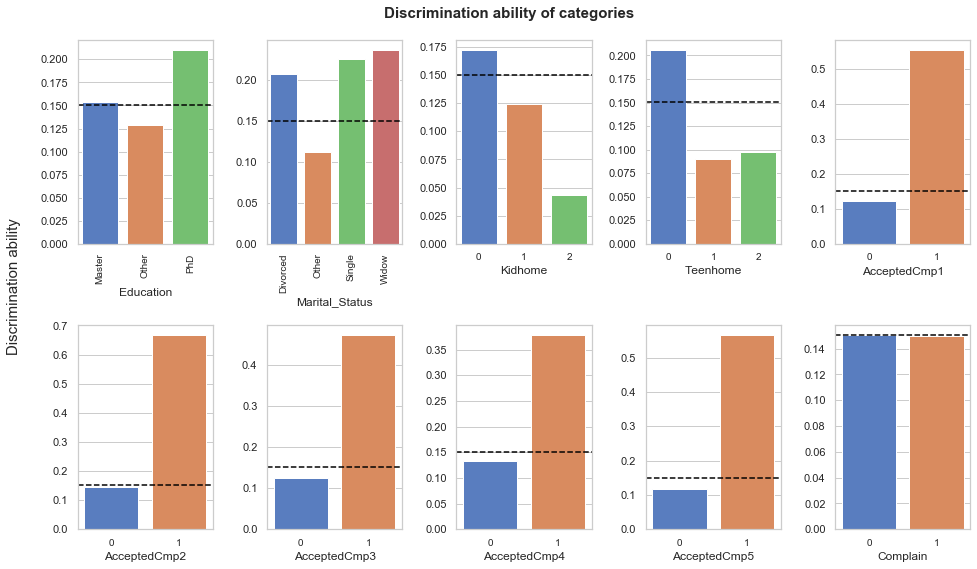

In [17]:
PlotCategoricalFeatures(df2, cat_feature, avg_discrimination_ability)

### Rank Categorical Classes

In [18]:
# Marital_Status:  "Single" as 3, "Widow" as 2, "Divorced" as 1 and ["Other"] as 0
df2["Marital_Status_bin"] = df2['Marital_Status'].apply(lambda x: 3 if x == "Widow" else
                                                            (2 if x == "Single" else
                                                             (1 if x == "Divorced" else 0))).astype(int)

# Education: "Phd" as 2, "Master" as 1 and ['Graduation', 'Basic', '2n Cycle'] as 0
df2["Education_bin"] = df2['Education'].apply(lambda x: 2 if x == "PhD" else (1 if x == "Master" else 0)).astype(int)
df2.drop(['Education','Marital_Status'],axis=1, inplace=True)

df2['NumberOfChildren'] = df2['Kidhome']+df2['Teenhome']
df2['HasOffspring'] = df2['NumberOfChildren'].apply(lambda x: 1 if x>0 else 0)

In [19]:
cat_feature = ["Kidhome", "Teenhome", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4","AcceptedCmp5", 
               "Complain", "Marital_Status_bin", "Education_bin", 'NumberOfChildren','HasOffspring']
cat_feature

['Kidhome',
 'Teenhome',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'Complain',
 'Marital_Status_bin',
 'Education_bin',
 'NumberOfChildren',
 'HasOffspring']

### Numerical Features Exploratory Analysis

In [20]:
num_feature = list(filter(lambda x: x not in cat_feature + ['Response'], list(df2.columns)))
num_feature_res = list(filter(lambda x: x not in cat_feature, list(df2.columns)))

In [21]:
num_feature

['Age',
 'Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Days_Customer']

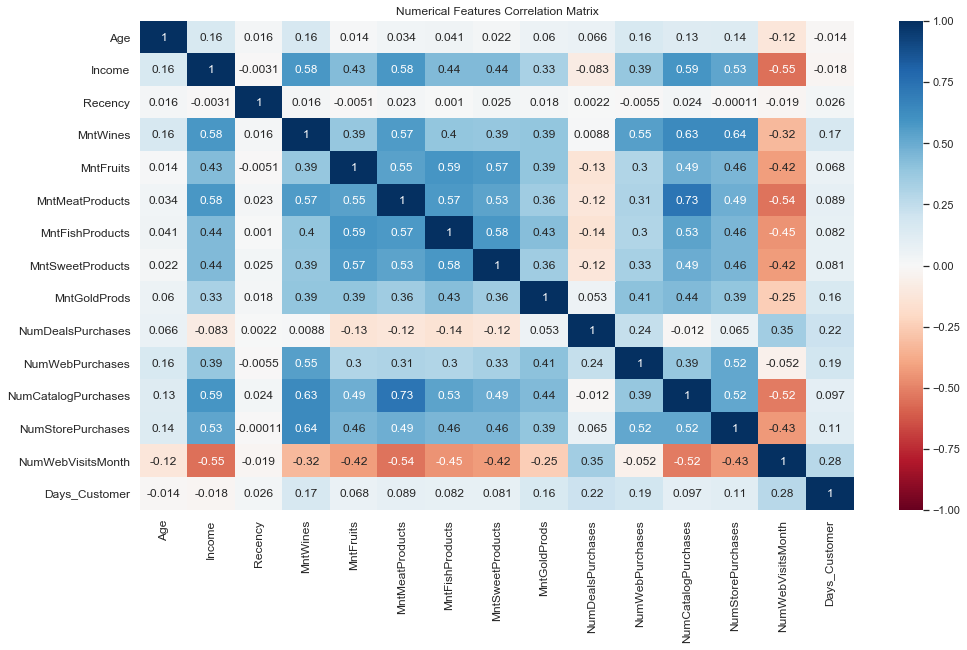

In [22]:
df_num = df2[num_feature]

plt.figure(figsize = (16, 9))
s = sns.heatmap(df_num.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Numerical Features Correlation Matrix')
plt.show()

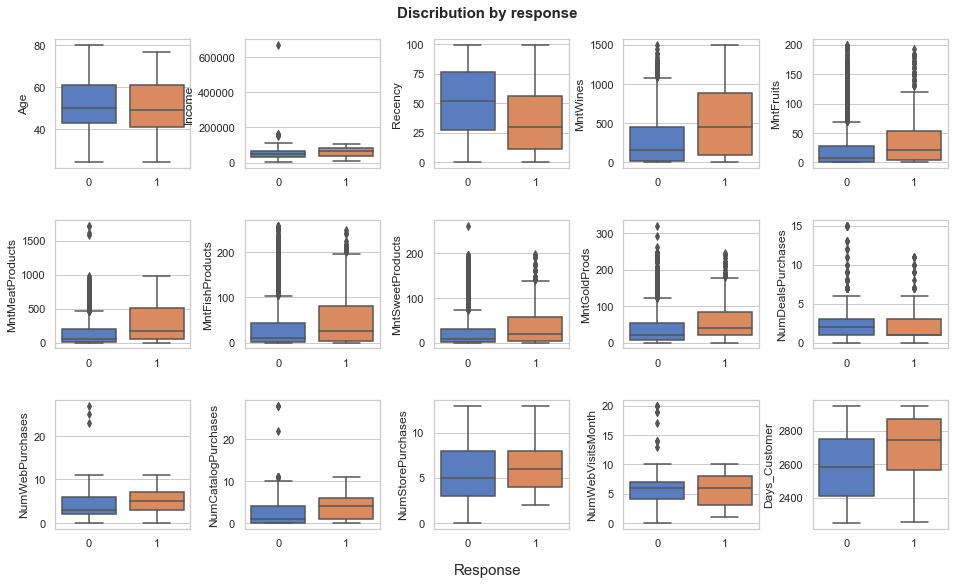

In [23]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i=1
sns.set(style='whitegrid')
for fc in num_feature:
    ax = fig.add_subplot(3, 5, i)
    sns.boxplot(x='Response', y=fc, data=df2, palette="muted")
    ax.set_xlabel("", size = 10)
    i+=1
fig.suptitle('Discribution by response', ha='center', va='center', fontsize=15, y=0.92, fontweight='bold')
fig.xaxis_title='Response'
fig.text(0.5, 0.06,'Response', ha='center', va='center', fontsize=15)
fig.set_figheight(9)
fig.set_figwidth(16)

## Train-Test-Split

In [24]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df2, test_size=0.3, random_state=4)

In [25]:
df3_train = train_set.copy()

## Data Cleaning - Second stage

### Multivariate Outlier Detection - Mahalanobis Distance

In [26]:
# Check if the matrix and its inverse are Symmetric and Positive Definite using Cholesky Decomposition Algorithm
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False 

# Calculate Mahalanobis Distance
def MahalanobisDistance(data):
    data = np.array(data)
    covmat = np.cov(data.T)
    if is_pos_def(covmat):
        inv_covmat = np.linalg.inv(covmat)
        if is_pos_def(inv_covmat):
            mean_values = []
            for i in range(data.shape[0]):
                mean_values.append(list(data.mean(axis=0)))
            diff = data - mean_values
            left_term = np.dot(diff, inv_covmat)
            mahal = np.dot(left_term, diff.T)
            return np.sqrt(mahal.diagonal())
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")

In [27]:
def MD_detectMulOutliers(data, extreme=False):
    MD = MahalanobisDistance(data)

    MD_std = np.std(MD)
    anomaly_cut_off = 3. * MD_std if extreme else 2. * MD_std
    MD_mean = np.mean(MD)
    upper_limit = MD_mean + anomaly_cut_off
    lower_limit = MD_mean - anomaly_cut_off
    outliers = []
    for i in range(len(MD)):
        if (MD[i] >= upper_limit) or (MD[i] <= lower_limit):
            outliers.append(i)  # index of the outlier
            
    outliers_MD = np.array(outliers)
    df_outliers_MD = pd.DataFrame()
    for i in outliers_MD:
        df_outliers_MD = df_outliers_MD.append(df3_train[num_feature].iloc[i,:])
    return df_outliers_MD

In [28]:
outliers = MD_detectMulOutliers(df3_train[num_feature_res])

### Multivariate Outlier Removal

In [29]:
df4_train = df3_train[~df3_train.index.isin(outliers.index)]
df4_train.head()

,Age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_Customer,Marital_Status_bin,Education_bin,NumberOfChildren,HasOffspring
1378,49,57420.0,0,1,22,280,0,18,0,0,24,3,5,1,6,7,0,1,0,0,0,0,0,2618,0,1,1,1
1580,64,34633.0,2,1,31,8,1,5,0,0,1,1,1,0,2,6,0,0,0,0,0,0,0,2406,0,0,3,1
1047,60,77037.0,0,1,3,463,96,333,168,53,10,1,7,7,12,3,0,0,0,0,0,0,0,2508,0,2,1,1
769,64,62058.0,0,1,52,301,7,74,10,0,58,4,6,1,7,6,0,0,0,0,0,0,0,2648,0,1,1,1
1340,58,50127.0,0,1,88,274,0,21,4,6,15,1,5,1,6,6,0,1,0,0,0,0,0,2280,0,0,1,1


In [30]:
# Dataframe after multivariate removal
train_set = df4_train.copy()

# Data Transformation

## Feature Engineering

In [31]:
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    
    def __init__(self): 
        pass
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        
        # Proportion of Monetary Units spent on gold product out of the total spent
        X["PrpGoldProds"]=X['MntGoldProds']/X[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].sum(axis=1)

        # Proportion of Monetary Units spent on wines out of the total spent
        X["PrpWines"]=X['MntWines']/X[['MntGoldProds', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].sum(axis=1)

        # Proportion of Monetary Units spent on fruits out of the total spent
        X["PrpFruits"]=X['MntFruits']/X[['MntGoldProds', 'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].sum(axis=1)

        # Proportion of Monetary Units spent on meat product out of the total spent
        X["PrpMeatProds"]=X['MntMeatProducts']/X[['MntGoldProds', 'MntWines', 'MntFruits', 'MntFishProducts', 'MntSweetProducts']].sum(axis=1)

        # Proportion of Monetary Units spent on fish product out of the total spent
        X["PrpFishProds"]=X['MntFishProducts']/X[['MntGoldProds', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntSweetProducts']].sum(axis=1)

        # Proportion of Monetary Units spent on sweet product out of the total spent
        X["PrpSweetProds"]=X['MntSweetProducts']/X[['MntGoldProds', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts']].sum(axis=1)

        # Monetary (Total spend)
        X['MntTotal']=X[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].sum(axis=1)
        
        # Frequency
        X['Frequency'] = X[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

        # Buy Potential (proportion of total spent and income)
        X['BuyPot'] = X['MntTotal']/X['Income']
        
        # Number of Accepted Campaigns out of the last 5 Campaigns
        X['NmbAccCmps'] = X[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)
        
        # Creating RFM feature using Recency, Freq and Mnt
        feature_list, n_bins = ["Recency", "Frequency", "MntTotal"], 5
        rfb_dict = {}
        for feature in feature_list:
            bindisc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy="quantile")
            feature_bin = bindisc.fit_transform(X[feature].values[:, np.newaxis])
            feature_bin = pd.Series(feature_bin[:, 0], index=X.index)
            feature_bin += 1
    
            if feature == "Recency":
                feature_bin = feature_bin.sub(5).abs() + 1
                
            rfb_dict[feature+"_bin"] = feature_bin.astype(int)

        X['RFM'] = ((rfb_dict['Recency_bin'] + rfb_dict['Frequency_bin'] + rfb_dict['MntTotal_bin'])/3).astype(int)
        
        return X

In [32]:
df5_train = df4_train.copy()
attr_adder = CombinedAttributesAdder()
df_extra_attribs = attr_adder.fit_transform(df5_train)

## Feature scaling on Numerical Attributes
- Min-Max Scaling
- Power Transformation - Box-Cox 

In [33]:
new_attributes = ['PrpGoldProds', 'PrpWines', 'PrpFruits', 'PrpMeatProds', 'PrpFishProds', 'PrpSweetProds', 
                  'MntTotal', 'Frequency', 'BuyPot', 'NmbAccCmps','RFM']
num_feature_ext = num_feature + new_attributes

## One Hot Encoding on Categorical Attributes

In [34]:
customer_info_cat_columns = ['Kidhome', 'Teenhome','NumberOfChildren','Marital_Status_bin','Education_bin']
df_dummies = pd.get_dummies(df_extra_attribs, prefix_sep="_",columns=customer_info_cat_columns)

In [35]:
cat_feature_ext = list(df_dummies.columns[-17:]) + ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4","AcceptedCmp5", 
               "Complain", 'HasOffspring']

In [36]:
class RemainingCatAttriAdder(BaseEstimator,TransformerMixin):
    
    def __init__(self): 
        pass
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        
        df_remaining_cat = X[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4","AcceptedCmp5", "Complain", 'HasOffspring']]
        
        return df_remaining_cat.values

## Build Transformation Pipeline

In [37]:
df_train = train_set.copy()
X_train = df_train.drop('Response', axis=1)
y_train = df_train['Response']

df_test = test_set.copy()
X_test =  df_test.drop('Response', axis=1)
y_test = df_test['Response']

In [38]:
num_attribs = num_feature_ext
cat_attribs = ['Kidhome', 'Teenhome','NumberOfChildren','Marital_Status_bin','Education_bin']
remaining_cat_attribs = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4","AcceptedCmp5", "Complain", 'HasOffspring']

# Step 1: Add attributes
df_added_attributes_train = attr_adder.fit_transform(df_train)

# Step 2: Numerical Attributes Transformation
num_pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler(feature_range=(1, 2))),
    ('power_bc', PowerTransformer(method='box-cox'))
#     ('standard_scaler', StandardScaler()),
#     ('power_yj', PowerTransformer(method='yeo-johnson'))
    ])

# Step 3: Categorical Attributes Transformation
# Step 4: Add remaining catagerical attributes

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
    ("remaining_cat", RemainingCatAttriAdder(), remaining_cat_attribs)
    ])

train_set_prepared = full_pipeline.fit_transform(df_added_attributes_train)

In [39]:
df_train_prepared = pd.DataFrame(train_set_prepared, index=df_train.index, columns = num_feature_ext+cat_feature_ext)
df_train_prepared.head()

,Age,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Days_Customer,PrpGoldProds,PrpWines,PrpFruits,PrpMeatProds,PrpFishProds,PrpSweetProds,MntTotal,Frequency,BuyPot,NmbAccCmps,RFM,Kidhome_0,Kidhome_1,Kidhome_2,Teenhome_0,Teenhome_1,Teenhome_2,NumberOfChildren_0,NumberOfChildren_1,NumberOfChildren_2,NumberOfChildren_3,Marital_Status_bin_0,Marital_Status_bin_1,Marital_Status_bin_2,Marital_Status_bin_3,Education_bin_0,Education_bin_1,Education_bin_2,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,HasOffspring
1378,-0.144995,0.312169,-0.911623,0.309694,-1.053512,-0.893637,-1.066445,-1.048188,-0.130249,0.830154,0.542100,-0.485779,0.306765,0.705560,0.119163,-0.267476,2.018865,-1.262222,-1.773782,-1.267143,-1.244770,-0.232531,0.120424,-0.301301,1.890387,0.302597,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1580,1.104607,-0.818135,-0.588455,-1.130795,-0.953112,-1.103844,-1.066445,-1.048188,-1.368794,-0.903975,-1.362462,-1.246121,-1.502410,0.232107,-0.939064,-0.382602,0.150301,0.735099,0.811281,-1.267143,-1.244770,-1.187165,-1.532738,-1.369295,-0.521917,-0.667583,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1047,0.779239,1.239256,-1.620042,0.848923,1.714116,1.298757,1.776575,1.311599,-0.803877,-0.903975,1.147602,1.470303,1.602877,-1.028564,-0.421557,-1.378791,-0.387433,1.053022,0.521825,1.304937,0.277552,1.141804,1.519063,0.946484,-0.521917,2.288670,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
769,1.104607,0.534883,0.139493,0.384132,-0.426615,-0.164317,-0.428716,-1.048188,0.857660,1.266370,0.864671,-0.485779,0.603011,0.232107,0.263816,0.412868,0.891004,-0.637458,-0.659604,-0.678627,-1.244770,0.007207,0.502244,-0.103024,-0.521917,0.302597,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1340,0.614512,-0.042813,1.317389,0.287710,-1.053512,-0.847610,-0.789718,-0.510712,-0.538174,-0.903975,0.542100,-0.485779,0.306765,0.232107,-1.603511,-0.692949,1.967563,-1.262222,-1.669418,-0.924635,-0.541899,-0.213590,-0.148392,-0.142520,1.890387,-0.667583,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## Feature Extraction & Selection

## PCA and Feature Importances

In [40]:
pca = PCA()
pca.fit(train_set_prepared)
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance >= .95])
n_to_reach_95 = len(train_set_prepared[0]) - n_over_95 + 1
print("Number features: {}\tTotal Explained Variance: {}".format(n_to_reach_95, total_explained_variance[n_to_reach_95-1]))

Number features: 19	Total Explained Variance: 0.9522846597324134


Text(0, 0.5, 'Cumulative Explained Variance')

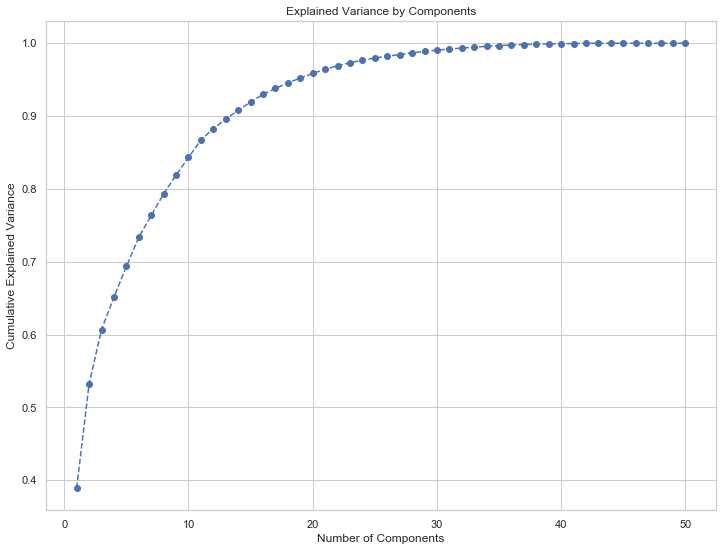

In [41]:
plt.figure(figsize = (12,9))
plt.plot(range(1,51), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [42]:
# Use PCA to figure out the most imporant features explained variance by each component
pca = PCA(n_components=n_to_reach_95)
pca.fit_transform(train_set_prepared)
initial_feature_names = df_train_prepared.columns
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_to_reach_95)]
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_to_reach_95)]

In [43]:
PCA_important_features = list(set(most_important_names))
PCA_important_features

['Age',
 'Recency',
 'NmbAccCmps',
 'Marital_Status_bin_0',
 'PrpWines',
 'NumStorePurchases',
 'Education_bin_0',
 'MntTotal',
 'PrpFishProds',
 'NumWebPurchases',
 'Days_Customer',
 'NumDealsPurchases',
 'PrpSweetProds',
 'NumberOfChildren_1']

## Feature Selection - Chi-Square Test for Categorical Variables and Binned Continuous Variables

In [44]:
def chisq_ranker(df, continuous_flist, categorical_flist, target, n_bins=10, binning_strategy="uniform"):
    chisq_dict = {}
    
    if continuous_flist:
        bindisc = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=binning_strategy)
        for feature in continuous_flist:            
            feature_bin = bindisc.fit_transform(df[feature].values[:, np.newaxis])
            feature_bin = pd.Series(feature_bin[:, 0], index=df.index)
            cont_tab = pd.crosstab(feature_bin, df[target], margins = False)
            chisq_dict[feature] = stats.chi2_contingency(cont_tab.values)[0:2] 
    
    if categorical_flist:
        for feature in categorical_flist:  
            cont_tab = pd.crosstab(df[feature], df[target], margins = False)          
            chisq_dict[feature] = stats.chi2_contingency(cont_tab.values)[0:2]       
    
    df_chi = pd.DataFrame(chisq_dict, index=["Chi-Squared", "p-value"]).transpose()
    df_chi.sort_values("Chi-Squared", ascending=False, inplace=True)
    df_chi["valid"]=df_chi["p-value"]<=0.05
    
    return df_chi

In [45]:
df_chisq = df_train_prepared.copy()
df_chisq['Response'] = df_train['Response']
df_chisq_rank = chisq_ranker(df_chisq, num_feature_ext, cat_feature_ext, "Response")
df_chisq_rank.head(15)

,Chi-Squared,p-value,valid
NmbAccCmps,182.076890,1.705945e-41,True
MntTotal,146.471788,4.741430e-27,True
AcceptedCmp5,126.781663,2.073782e-29,True
MntWines,125.984310,7.927296e-23,True
BuyPot,113.131112,3.383758e-20,True
AcceptedCmp1,109.418562,1.313934e-25,True
RFM,107.031955,3.124856e-22,True
AcceptedCmp3,106.819573,4.876008e-25,True
Income,87.380338,5.453435e-15,True
NumCatalogPurchases,85.907482,8.546046e-16,True


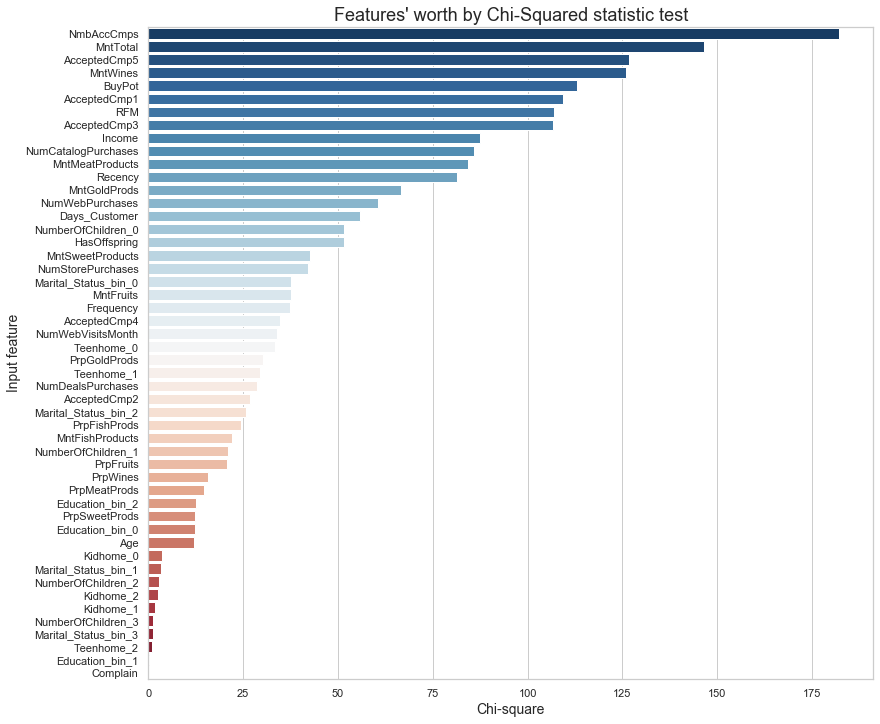

In [46]:
sns.set_style('whitegrid') 

plt.subplots(figsize=(13,12))
pal = sns.color_palette("RdBu_r", len(df_chisq_rank))
rank = df_chisq_rank['Chi-Squared'].argsort().argsort()  

sns.barplot(y=df_chisq_rank.index,x=df_chisq_rank['Chi-Squared'], palette=np.array(pal[::-1])[rank])
plt.title("Features' worth by Chi-Squared statistic test", fontsize=18)
plt.ylabel("Input feature", fontsize=14)
plt.xlabel("Chi-square", fontsize=14)
plt.show()

In [47]:
chisq_top_15_features = list(df_chisq_rank.index[:15])
chisq_top_15_features

['NmbAccCmps',
 'MntTotal',
 'AcceptedCmp5',
 'MntWines',
 'BuyPot',
 'AcceptedCmp1',
 'RFM',
 'AcceptedCmp3',
 'Income',
 'NumCatalogPurchases',
 'MntMeatProducts',
 'Recency',
 'MntGoldProds',
 'NumWebPurchases',
 'Days_Customer']

## Training and Evaluating on the Training Set

#### Logistic Regression

In [48]:
LR_clf = LogisticRegression(max_iter=200)
LR_clf.fit(train_set_prepared, y_train)
y_train_pred = LR_clf.predict(train_set_prepared)
confusion_matrix(y_train, y_train_pred)

array([[1246,   40],
       [ 110,  117]])

In [49]:
y_train_probas = LR_clf.predict_proba(train_set_prepared)
y_train_scores = y_train_probas[:,1]
roc_auc_score(y_train, y_train_scores)

0.9284209480614685

#### Random Forest Classifier

In [50]:
RF_clf = RandomForestClassifier()
RF_clf.fit(train_set_prepared, y_train)
y_train_pred = RF_clf.predict(train_set_prepared)
confusion_matrix(y_train, y_train_pred)

array([[1283,    3],
       [   6,  221]])

In [51]:
y_train_probas = RF_clf.predict_proba(train_set_prepared)
y_train_scores = y_train_probas[:,1]
roc_auc_score(y_train, y_train_scores)

0.9998612643103295

#### Naive Bayes

In [52]:
NB_clf = GaussianNB()
NB_clf.fit(train_set_prepared, y_train)
y_train_pred = NB_clf.predict(train_set_prepared)
confusion_matrix(y_train, y_train_pred)

array([[998, 288],
       [ 83, 144]])

In [53]:
roc_auc_score(y_train, y_train_pred)

0.7052055000993417

### Model Evaluation using Cross-Validation
Use the train_test_split function to split the training set into a smaller training set and a validation set, then train your models against the smaller training set and evaluate them against the validation set

cross_val_score() has the same result as GridSearchCV().predict

In [54]:
skfolds = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [55]:
scores = cross_val_score(LR_clf, train_set_prepared, y_train, cv=skfolds, scoring='roc_auc')
print('Mean ROC AUC (LR): %.3f' % np.mean(scores))

Mean ROC AUC (LR): 0.911


In [56]:
scores = cross_val_score(RF_clf, train_set_prepared, y_train, cv=skfolds, scoring='roc_auc')
print('Mean ROC AUC (RF): %.3f' % np.mean(scores))

Mean ROC AUC (RF): 0.891


In [57]:
scores = cross_val_score(NB_clf, train_set_prepared, y_train, cv=skfolds, scoring='roc_auc')
print('Mean ROC AUC (NB): %.3f' % np.mean(scores))

Mean ROC AUC (NB): 0.769


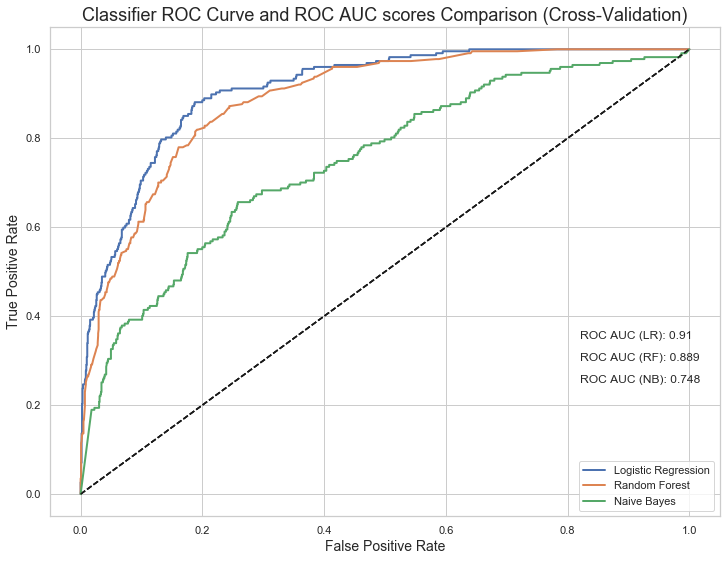

In [81]:
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--')

LR_clf = LogisticRegression(max_iter=200)
y_probas_LR = cross_val_predict(LR_clf, train_set_prepared, y_train, cv=skfolds, method="predict_proba")
y_scores_LR = y_probas_LR[:, 1] # score = proba of positive class 
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_train, y_scores_LR)

RF_clf = RandomForestClassifier()
y_probas_RF = cross_val_predict(RF_clf, train_set_prepared, y_train, cv=skfolds, method="predict_proba")
y_scores_RF = y_probas_RF[:, 1] # score = proba of positive class 
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_train, y_scores_RF)

NB_clf = GaussianNB()
y_probas_NB = cross_val_predict(NB_clf, train_set_prepared, y_train, cv=skfolds, method="predict_proba")
y_scores_NB = y_probas_NB[:, 1] # score = proba of positive class 
fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_train, y_scores_NB)

plt.figure(figsize = (12,9))
plot_roc_curve(fpr_LR, tpr_LR, "Logistic Regression") 
plot_roc_curve(fpr_RF, tpr_RF, "Random Forest") 
plot_roc_curve(fpr_NB, tpr_NB, "Naive Bayes")

plt.legend(loc="lower right")
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title("Classifier ROC Curve and ROC AUC scores Comparison (Cross-Validation)", fontsize=18)
plt.text(0.82, 0.35, 'ROC AUC (LR): ' + str(round(roc_auc_score(y_train, y_scores_LR),3)), fontsize=12)
plt.text(0.82, 0.30, 'ROC AUC (RF): ' + str(round(roc_auc_score(y_train, y_scores_RF),3)), fontsize=12)
plt.text(0.82, 0.25, 'ROC AUC (NB): ' + str(round(roc_auc_score(y_train, y_scores_NB),3)), fontsize=12)
plt.show()

## Random Forest and Feature Importances

In [59]:
RF_clf = RandomForestClassifier()
grid_values = {'n_estimators' : list(range(10,101,20)), 'max_features' : list(range(15,51,5))}
grid_RF_clf = GridSearchCV(RF_clf, param_grid = grid_values, cv=skfolds, scoring = 'roc_auc')
grid_RF_clf.fit(train_set_prepared, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_features': [15, 20, 25, 30, 35, 40, 45, 50],
                         'n_estimators': [10, 30, 50, 70, 90]},
             scoring='roc_auc')

In [60]:
feature_importances = grid_RF_clf.best_estimator_.feature_importances_
RF_top_15_features = list(pd.DataFrame(sorted(zip(feature_importances, df_train_prepared.columns), reverse=True), columns = ['score', 'feature']).head(15)['feature'])
RF_top_15_features

['NmbAccCmps',
 'Recency',
 'Days_Customer',
 'PrpMeatProds',
 'Income',
 'PrpGoldProds',
 'Age',
 'NumWebVisitsMonth',
 'MntMeatProducts',
 'MntGoldProds',
 'MntTotal',
 'NumStorePurchases',
 'PrpSweetProds',
 'MntWines',
 'PrpWines']

### Evaluate model performance by feature selection techniques

In [61]:
def plot_roc_curve_with_clf(X, y, clf, label=None): 
    clf.fit(X, y)
    y_probas = clf.predict_proba(X)
    y_scores = y_probas[:, 1]
    fpr, tpr, thresholds = roc_curve(y, y_scores)
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

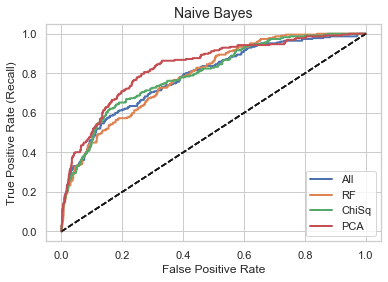

In [87]:
clf = GaussianNB()
plot_roc_curve_with_clf(train_set_prepared, y_train, clf, 'All')
plot_roc_curve_with_clf(df_train_prepared[RF_top_15_features].values, y_train, clf, 'RF') 
plot_roc_curve_with_clf(df_train_prepared[chisq_top_15_features].values, y_train, clf, 'ChiSq') 
plot_roc_curve_with_clf(df_train_prepared[PCA_important_features].values, y_train, clf, 'PCA') 
plt.title("Naive Bayes", fontsize=14)
plt.show()

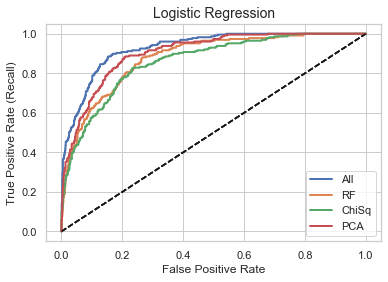

In [86]:
clf = LogisticRegression(max_iter = 200)
plot_roc_curve_with_clf(train_set_prepared, y_train, clf, 'All')
plot_roc_curve_with_clf(df_train_prepared[RF_top_15_features].values, y_train, clf, 'RF') 
plot_roc_curve_with_clf(df_train_prepared[chisq_top_15_features].values, y_train, clf, 'ChiSq') 
plot_roc_curve_with_clf(df_train_prepared[PCA_important_features].values, y_train, clf, 'PCA') 
plt.title("Logistic Regression", fontsize=14)
plt.show()

## Evaluate the System on the Test Set

In [64]:
df_added_attributes_test = attr_adder.transform(df_test)
test_set_prepared = full_pipeline.transform(df_added_attributes_test)
df_test_prepared = pd.DataFrame(test_set_prepared, index=test_set.index, columns = num_feature_ext+cat_feature_ext)

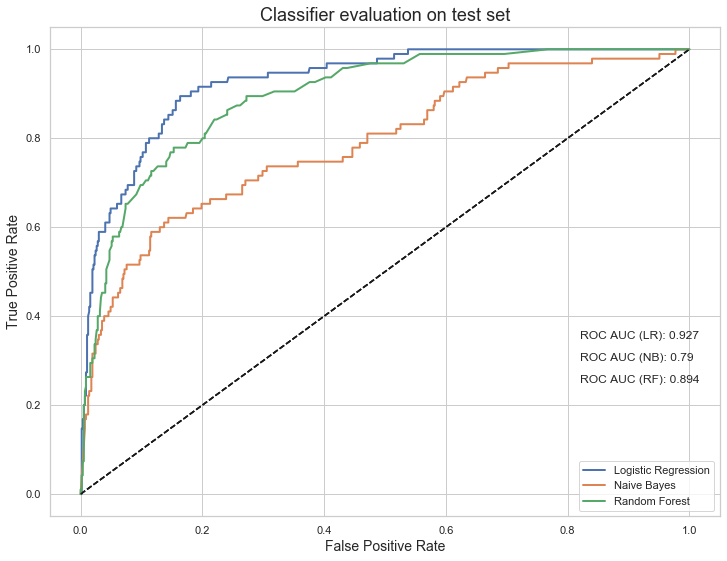

In [84]:
LR_clf = LogisticRegression(max_iter=200)
LR_clf.fit(train_set_prepared, y_train)
LR_probas = LR_clf.predict_proba(test_set_prepared)
LR_predictions = LR_probas[:, 1]
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, LR_predictions)

NB_clf = GaussianNB()
NB_clf.fit(train_set_prepared, y_train)
NB_probas = NB_clf.predict_proba(test_set_prepared)
NB_predictions = NB_probas[:, 1]
fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test, NB_predictions)

RF_clf = RandomForestClassifier()
RF_clf.fit(train_set_prepared, y_train)
RF_probas = RF_clf.predict_proba(test_set_prepared)
RF_predictions = RF_probas[:, 1]
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, RF_predictions)

plt.figure(figsize = (12,9))
plot_roc_curve(fpr_LR, tpr_LR, "Logistic Regression") 
plot_roc_curve(fpr_NB, tpr_NB, "Naive Bayes")
plot_roc_curve(fpr_RF, tpr_RF, "Random Forest")
plt.legend(loc="lower right")
plt.title("Classifier evaluation on test set", fontsize=18)
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.text(0.82, 0.35, 'ROC AUC (LR): ' + str(round(roc_auc_score(y_test, LR_predictions),3)), fontsize=12)
plt.text(0.82, 0.30, 'ROC AUC (NB): ' + str(round(roc_auc_score(y_test, NB_predictions),3)), fontsize=12)
plt.text(0.82, 0.25, 'ROC AUC (RF): ' + str(round(roc_auc_score(y_test, RF_predictions),3)), fontsize=12)
plt.show()

## Evaluate the System on the Test Set only with important features

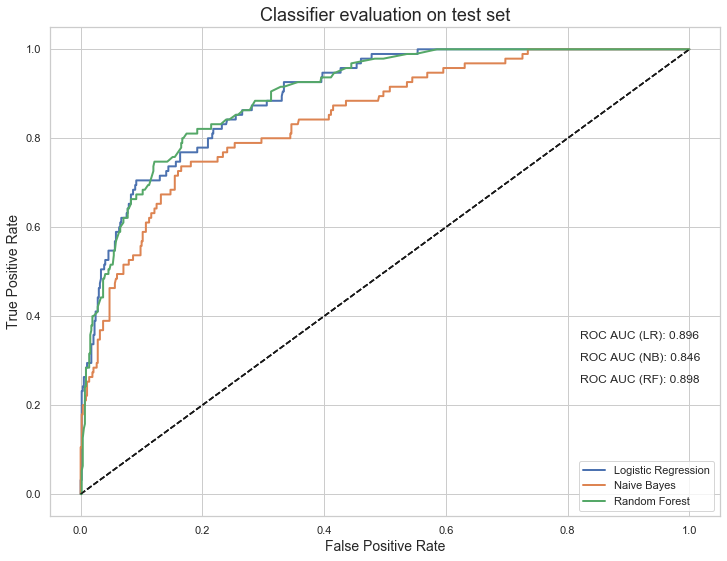

In [85]:
LR_clf = LogisticRegression(max_iter=200)
LR_clf.fit(df_train_prepared[PCA_important_features].values, y_train)
LR_probas = LR_clf.predict_proba(df_test_prepared[PCA_important_features].values)
LR_predictions = LR_probas[:, 1]
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, LR_predictions)

NB_clf = GaussianNB()
NB_clf.fit(df_train_prepared[PCA_important_features].values, y_train)
NB_probas = NB_clf.predict_proba(df_test_prepared[PCA_important_features].values)
NB_predictions = NB_probas[:, 1]
fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test, NB_predictions)

RF_clf = RandomForestClassifier()
RF_clf.fit(df_train_prepared[PCA_important_features].values, y_train)
RF_probas = RF_clf.predict_proba(df_test_prepared[PCA_important_features].values)
RF_predictions = RF_probas[:, 1]
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, RF_predictions)

plt.figure(figsize = (12,9))
plot_roc_curve(fpr_LR, tpr_LR, "Logistic Regression") 
plot_roc_curve(fpr_NB, tpr_NB, "Naive Bayes")
plot_roc_curve(fpr_RF, tpr_RF, "Random Forest")
plt.legend(loc="lower right")
plt.title("Classifier evaluation on test set", fontsize=18)
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.text(0.82, 0.35, 'ROC AUC (LR): ' + str(round(roc_auc_score(y_test, LR_predictions),3)), fontsize=12)
plt.text(0.82, 0.30, 'ROC AUC (NB): ' + str(round(roc_auc_score(y_test, NB_predictions),3)), fontsize=12)
plt.text(0.82, 0.25, 'ROC AUC (RF): ' + str(round(roc_auc_score(y_test, RF_predictions),3)), fontsize=12)
plt.show()